In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from prettytable import PrettyTable

cancer = pd.read_csv('haberman.csv', header=None, names=['Age', 'Year_of_Operation', 'Axillary_Nodes', 'Survival_Status'])
cancer

,Age,Year_of_Operation,Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


# EDA With Titanic Data Set

### 1.General Dataset Information:

In [2]:
print(cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                306 non-null    int64
 1   Year_of_Operation  306 non-null    int64
 2   Axillary_Nodes     306 non-null    int64
 3   Survival_Status    306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


In [3]:
# General statistics about the dataset(data.describe() or, print(data.describe()))
print(cancer.describe())

              Age  Year_of_Operation  Axillary_Nodes  Survival_Status
count  306.000000         306.000000      306.000000       306.000000
mean    52.457516          62.852941        4.026144         1.264706
std     10.803452           3.249405        7.189654         0.441899
min     30.000000          58.000000        0.000000         1.000000
25%     44.000000          60.000000        0.000000         1.000000
50%     52.000000          63.000000        1.000000         1.000000
75%     60.750000          65.750000        4.000000         2.000000
max     83.000000          69.000000       52.000000         2.000000


In [4]:
# Checking for missing values(data.isnull().sum() or, print(data.isnull().sum()))
print(cancer.isnull().sum())

Age                  0
Year_of_Operation    0
Axillary_Nodes       0
Survival_Status      0
dtype: int64


# 2. Data Visualization:

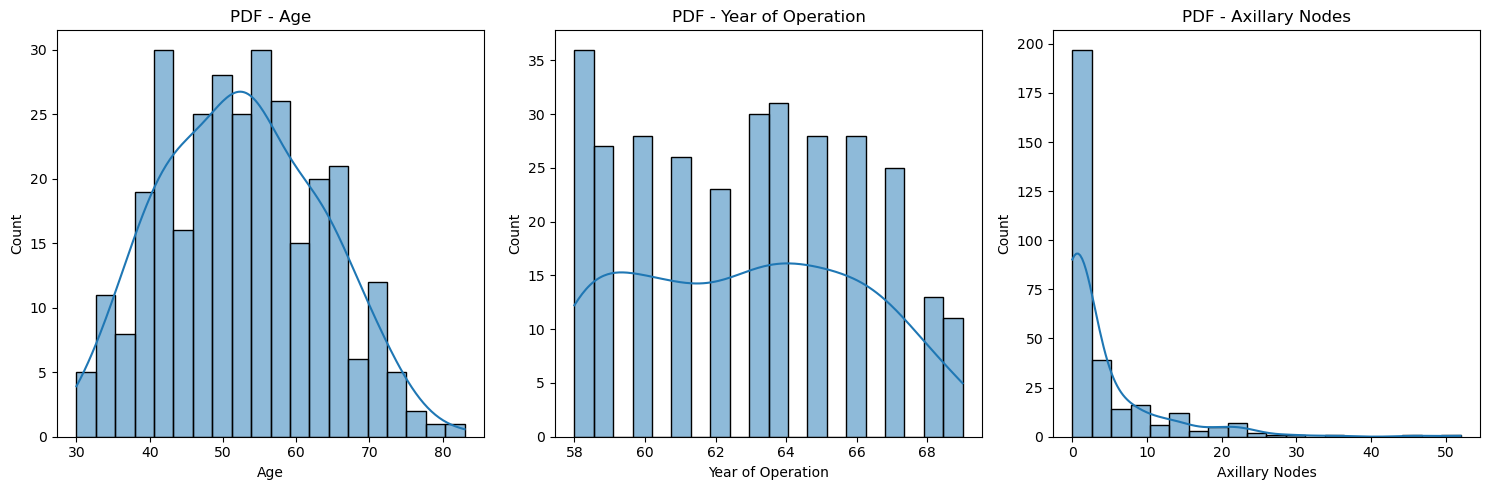

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


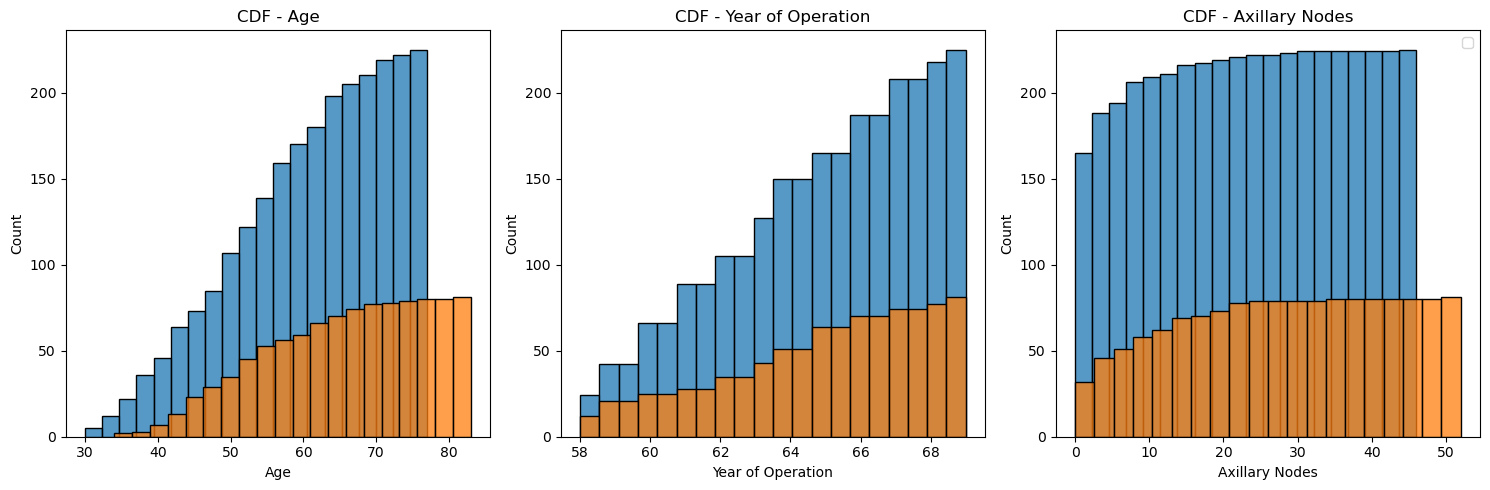

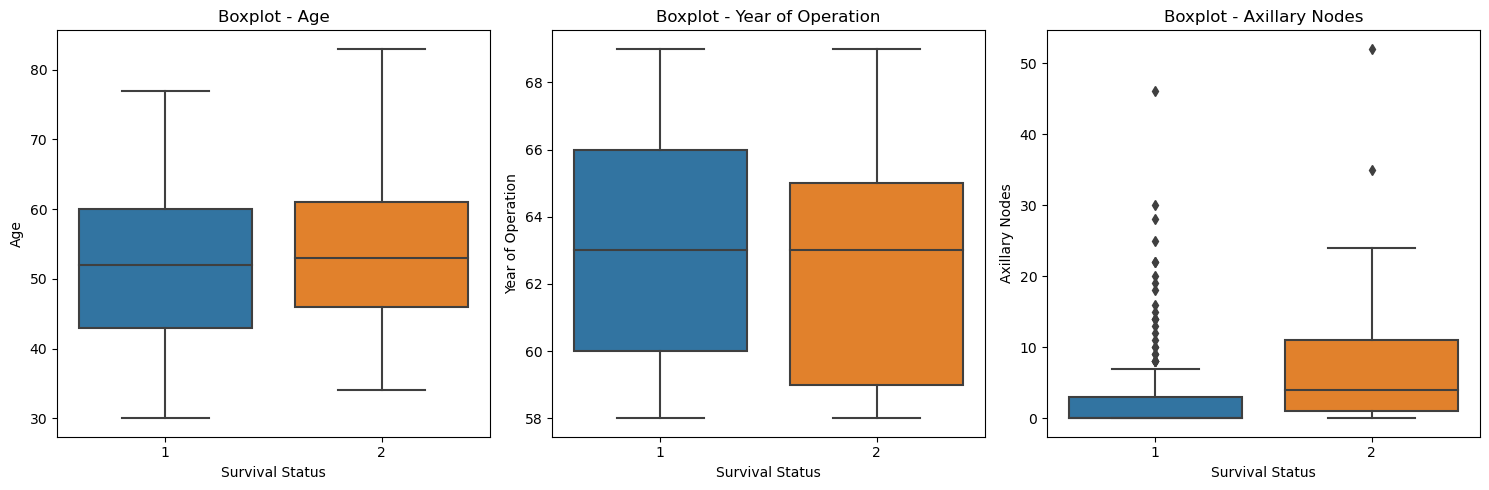

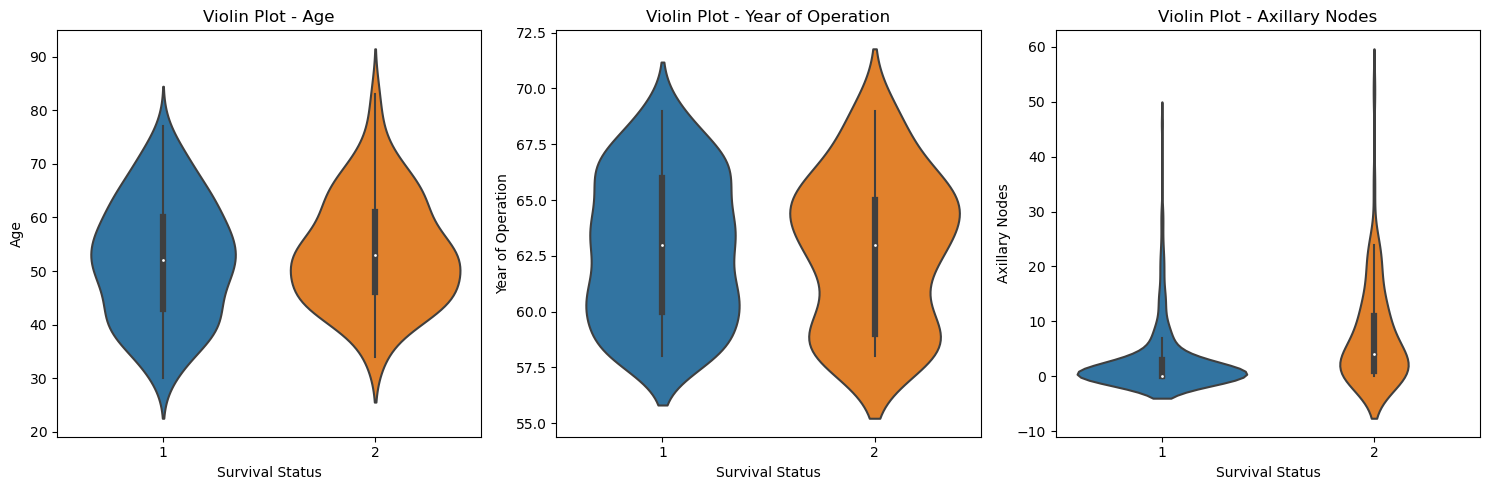

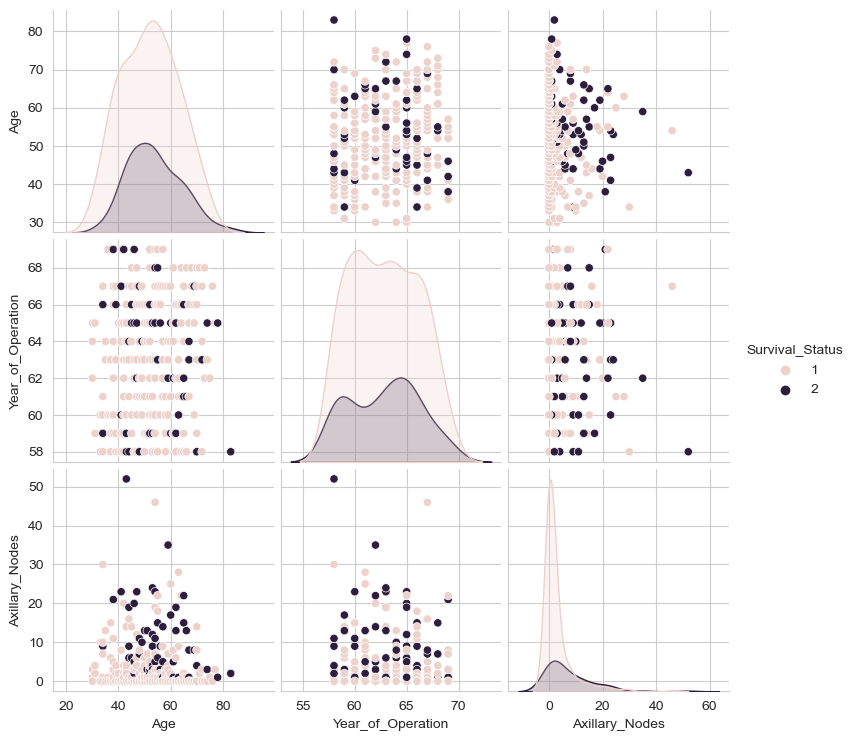

In [5]:
# Pairplot to visualize relationships between features.

# PDF
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(cancer['Age'], kde=True, bins=20)
plt.xlabel('Age')
plt.title('PDF - Age')

plt.subplot(132)
sns.histplot(cancer['Year_of_Operation'], kde=True, bins=20)
plt.xlabel('Year of Operation')
plt.title('PDF - Year of Operation')

plt.subplot(133)
sns.histplot(cancer['Axillary_Nodes'], kde=True, bins=20)
plt.xlabel('Axillary Nodes')
plt.title('PDF - Axillary Nodes')

plt.tight_layout()
plt.show()

# CDF
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.histplot(cancer[cancer['Survival_Status'] == 1]['Age'], cumulative=True, kde_kws={'label': 'Survived'}, bins=20)
sns.histplot(cancer[cancer['Survival_Status'] == 2]['Age'], cumulative=True, kde_kws={'label': 'Died'}, bins=20)
plt.xlabel('Age')
plt.title('CDF - Age')

plt.subplot(132)
sns.histplot(cancer[cancer['Survival_Status'] == 1]['Year_of_Operation'], cumulative=True, kde_kws={'label': 'Survived'}, bins=20)
sns.histplot(cancer[cancer['Survival_Status'] == 2]['Year_of_Operation'], cumulative=True, kde_kws={'label': 'Died'}, bins=20)
plt.xlabel('Year of Operation')
plt.title('CDF - Year of Operation')

plt.subplot(133)
sns.histplot(cancer[cancer['Survival_Status'] == 1]['Axillary_Nodes'], cumulative=True, kde_kws={'label': 'Survived'}, bins=20)
sns.histplot(cancer[cancer['Survival_Status'] == 2]['Axillary_Nodes'], cumulative=True, kde_kws={'label': 'Died'}, bins=20)
plt.xlabel('Axillary Nodes')
plt.title('CDF - Axillary Nodes')

plt.tight_layout()
plt.legend()
plt.show()

# Boxplot
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.boxplot(x='Survival_Status', y='Age', data=cancer)
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.title('Boxplot - Age')

plt.subplot(132)
sns.boxplot(x='Survival_Status', y='Year_of_Operation', data=cancer)
plt.xlabel('Survival Status')
plt.ylabel('Year of Operation')
plt.title('Boxplot - Year of Operation')

plt.subplot(133)
sns.boxplot(x='Survival_Status', y='Axillary_Nodes', data=cancer)
plt.xlabel('Survival Status')
plt.ylabel('Axillary Nodes')
plt.title('Boxplot - Axillary Nodes')

plt.tight_layout()
plt.show()

# Violin Plots
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.violinplot(x='Survival_Status', y='Age', data=cancer)
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.title('Violin Plot - Age')

plt.subplot(132)
sns.violinplot(x='Survival_Status', y='Year_of_Operation', data=cancer)
plt.xlabel('Survival Status')
plt.ylabel('Year of Operation')
plt.title('Violin Plot - Year of Operation')

plt.subplot(133)
sns.violinplot(x='Survival_Status', y='Axillary_Nodes', data=cancer)
plt.xlabel('Survival Status')
plt.ylabel('Axillary Nodes')
plt.title('Violin Plot - Axillary Nodes')

plt.tight_layout()
plt.show()

# Step 4: Bivariate Analysis
# Scatter plots for combinations of features
sns.set_style("whitegrid")
sns.pairplot(cancer, hue='Survival_Status', vars=['Age', 'Year_of_Operation', 'Axillary_Nodes'], diag_kind='kde')
plt.show()

### 3. Statistical Summaries:

In [6]:
# Number of data points
num_data_points = len(cancer)

# Number of features
num_features = cancer.shape[1] - 1  # Excluding the target variable

# Number of classes
num_classes = len(cancer['Survival_Status'].unique())

# Data points per class
data_points_per_class = cancer['Survival_Status'].value_counts()

# Displaying the results
print(f"Number of data points: {num_data_points}")
print(f"Number of features: {num_features}")
print(f"Number of classes: {num_classes}")
print("\nData points per class:")
print(data_points_per_class)

Number of data points: 306
Number of features: 3
Number of classes: 2

Data points per class:
1    225
2     81
Name: Survival_Status, dtype: int64


### 4. Correlation Analysis:

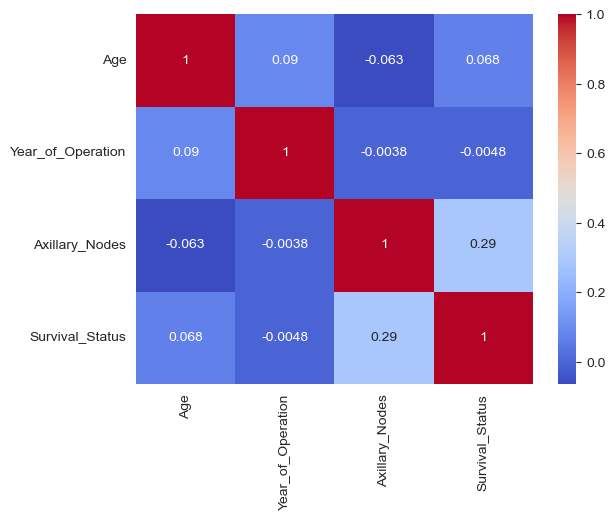

In [7]:
correlation_matrix = cancer.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Implementing Various ML Models:

# 1. KNN:

In [8]:
x = cancer[['Age', 'Year_of_Operation', 'Axillary_Nodes']]
y = cancer['Survival_Status']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
y_train.value_counts()

1    181
2     63
Name: Survival_Status, dtype: int64

In [10]:
y_test.value_counts()

1    44
2    18
Name: Survival_Status, dtype: int64

In [11]:
x_train.value_counts()

Age  Year_of_Operation  Axillary_Nodes
38   60                 0                 2
62   66                 0                 2
65   64                 0                 2
     58                 0                 2
66   58                 0                 2
                                         ..
49   61                 0                 1
     62                 0                 1
                        1                 1
     63                 0                 1
83   58                 2                 1
Length: 229, dtype: int64

In [12]:
x_test.value_counts()

Age  Year_of_Operation  Axillary_Nodes
61   59                 0                 2
56   60                 0                 2
44   61                 0                 2
31   59                 2                 1
53   65                 1                 1
54   60                 11                1
     63                 19                1
55   58                 1                 1
56   66                 2                 1
     67                 0                 1
57   62                 0                 1
58   67                 0                 1
59   64                 7                 1
60   59                 17                1
     65                 0                 1
61   65                 0                 1
52   63                 4                 1
62   59                 13                1
63   61                 9                 1
     63                 0                 1
64   65                 22                1
66   58                 1            

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((244, 3), (62, 3), (244,), (62,))

In [14]:
y_pred_test = knn.predict(x_test)
y_pred_train = knn.predict(x_train)
acc_test = accuracy_score(y_test, y_pred_test)
acc_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy: {acc_test:.3f}')
print(f'Accuracy: {acc_train:.3f}')

Accuracy: 0.661
Accuracy: 0.795


In [15]:
for i in range(20,30):
    
    print('K=',i)
    
    # initialization
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # Training
    knn.fit(x_train, y_train)
    
     # Test the test data
    y_pred_test = knn.predict(x_test)
    accuracy_test = accuracy_score(y_pred_test,y_test)    
    
    # Test the training data
    y_pred_train = knn.predict(x_train)
    accuracy_train = accuracy_score(y_pred_train,y_train)

   
    print('for k =',i,'Accuracy Train is =',accuracy_train,'& Accuracy Test is =',accuracy_test)


K= 20
for k = 20 Accuracy Train is = 0.7745901639344263 & Accuracy Test is = 0.7258064516129032
K= 21
for k = 21 Accuracy Train is = 0.7704918032786885 & Accuracy Test is = 0.6935483870967742
K= 22
for k = 22 Accuracy Train is = 0.7786885245901639 & Accuracy Test is = 0.7096774193548387
K= 23
for k = 23 Accuracy Train is = 0.7786885245901639 & Accuracy Test is = 0.7096774193548387
K= 24
for k = 24 Accuracy Train is = 0.7827868852459017 & Accuracy Test is = 0.7419354838709677
K= 25
for k = 25 Accuracy Train is = 0.7827868852459017 & Accuracy Test is = 0.7419354838709677
K= 26
for k = 26 Accuracy Train is = 0.7909836065573771 & Accuracy Test is = 0.7419354838709677
K= 27
for k = 27 Accuracy Train is = 0.7868852459016393 & Accuracy Test is = 0.7419354838709677
K= 28
for k = 28 Accuracy Train is = 0.7827868852459017 & Accuracy Test is = 0.7419354838709677
K= 29
for k = 29 Accuracy Train is = 0.7827868852459017 & Accuracy Test is = 0.7419354838709677


In [16]:
from sklearn.metrics import classification_report

# Assuming you have trained and predicted with the KNN model
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train, y_train)
y_pred_test = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

# Create a classification report
report_knn_test = classification_report(y_test, y_pred_test)
report_knn_train = classification_report(y_train, y_pred_train)

# Print the classification report
print("Classification Report for KNN Test:")
print(report_knn_test)
print("Classification Report for KNN Train:")
print(report_knn_train)

Classification Report for KNN Test:
              precision    recall  f1-score   support

           1       0.75      0.95      0.84        44
           2       0.67      0.22      0.33        18

    accuracy                           0.74        62
   macro avg       0.71      0.59      0.59        62
weighted avg       0.73      0.74      0.69        62

Classification Report for KNN Train:
              precision    recall  f1-score   support

           1       0.79      0.96      0.87       181
           2       0.71      0.27      0.39        63

    accuracy                           0.78       244
   macro avg       0.75      0.62      0.63       244
weighted avg       0.77      0.78      0.74       244



<Axes: >

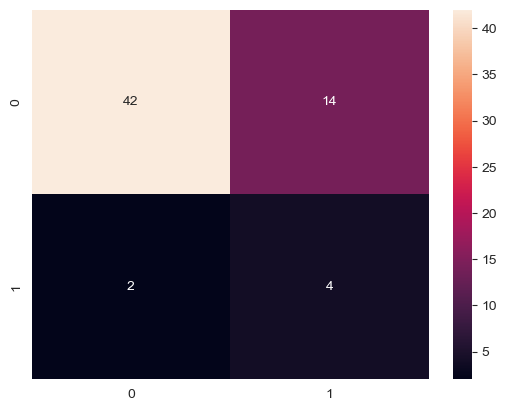

In [17]:
c_knn_test = confusion_matrix(y_pred_test,y_test)
sns.heatmap(c_knn_test, annot=True)

<Axes: >

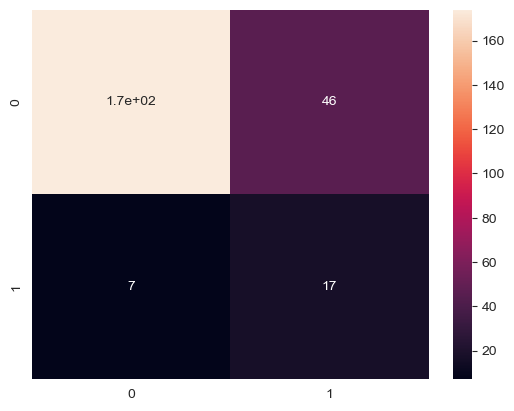

In [18]:
c_knn_train = confusion_matrix(y_pred_train,y_train)
sns.heatmap(c_knn_train, annot=True)

# 2.  Naive Bayes Classifier

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [20]:
x = cancer[['Age', 'Year_of_Operation', 'Axillary_Nodes']]
y = cancer['Survival_Status']

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [21]:
# GaussianNB
G_classifier = GaussianNB()
G_classifier.fit(x_train, y_train)
# GaussianNB()
y_pred_test = G_classifier.predict(x_test)
y_pred_train = G_classifier.predict(x_train)
acc_test = metrics.accuracy_score(y_test, y_pred_test)
acc_train = metrics.accuracy_score(y_train, y_pred_train)
print(acc_test)
print(acc_train)

0.7096774193548387
0.7622950819672131


In [22]:
report_y_pred_test = classification_report(y_test, y_pred_test)

print("Classification Report for GaussianNB_test:")
print(report_y_pred_test)


Classification Report for GaussianNB_test:
              precision    recall  f1-score   support

           1       0.74      0.91      0.82        44
           2       0.50      0.22      0.31        18

    accuracy                           0.71        62
   macro avg       0.62      0.57      0.56        62
weighted avg       0.67      0.71      0.67        62



In [23]:
report_y_pred_train = classification_report(y_train, y_pred_train)

print("Classification Report for GaussianNB_train:")
print(report_y_pred_train)


Classification Report for GaussianNB_train:
              precision    recall  f1-score   support

           1       0.78      0.95      0.86       181
           2       0.61      0.22      0.33        63

    accuracy                           0.76       244
   macro avg       0.69      0.59      0.59       244
weighted avg       0.73      0.76      0.72       244



<Axes: >

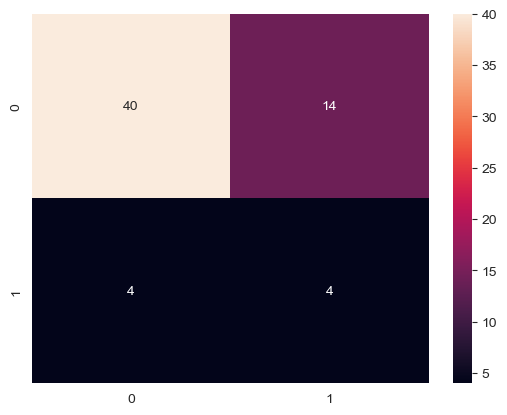

In [24]:
c_GaussianNB_test = confusion_matrix(y_pred_test,y_test)
sns.heatmap(c_GaussianNB_test, annot=True)

<Axes: >

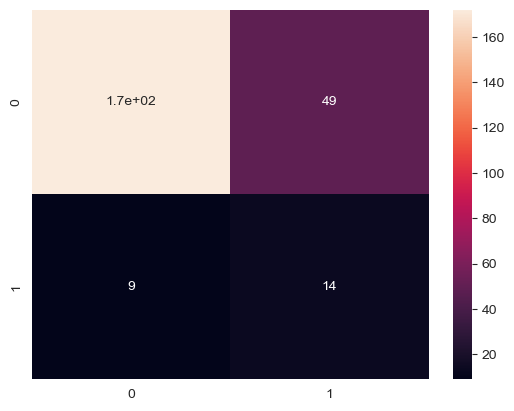

In [25]:
c_GaussianNB_train = confusion_matrix(y_pred_train,y_train)
sns.heatmap(c_GaussianNB_train, annot=True)

In [26]:
# BernoulliNB()
B_classifier = BernoulliNB()
B_classifier.fit(x_train, y_train)
BernoulliNB()
y_pred_test = B_classifier.predict(x_test)
y_pred_train = B_classifier.predict(x_train)
acc_test = metrics.accuracy_score(y_test, y_pred_test)
acc_train = metrics.accuracy_score(y_train, y_pred_train)
print(acc_test)
print(acc_train)

0.7096774193548387
0.7418032786885246


In [27]:
report_y_pred_test = classification_report(y_test, y_pred_test)

print("Classification Report for BernoulliNB_test:")
print(report_y_pred_test)

Classification Report for BernoulliNB_test:
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        44
           2       0.00      0.00      0.00        18

    accuracy                           0.71        62
   macro avg       0.35      0.50      0.42        62
weighted avg       0.50      0.71      0.59        62



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
report_y_pred_train = classification_report(y_train, y_pred_train)

print("Classification Report for BernoulliNB_train:")
print(report_y_pred_train)

Classification Report for BernoulliNB_train:
              precision    recall  f1-score   support

           1       0.74      1.00      0.85       181
           2       0.00      0.00      0.00        63

    accuracy                           0.74       244
   macro avg       0.37      0.50      0.43       244
weighted avg       0.55      0.74      0.63       244



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

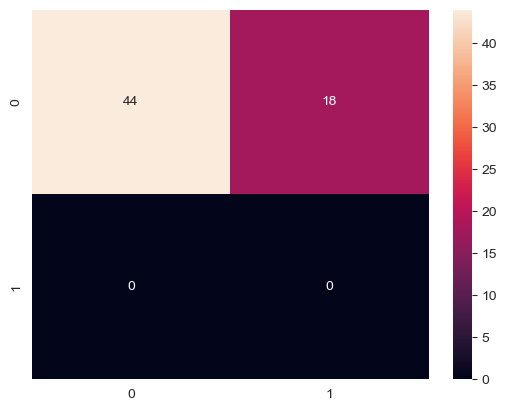

In [29]:
c_BernoulliNB_test = confusion_matrix(y_pred_test,y_test)
sns.heatmap(c_BernoulliNB_test, annot=True)

<Axes: >

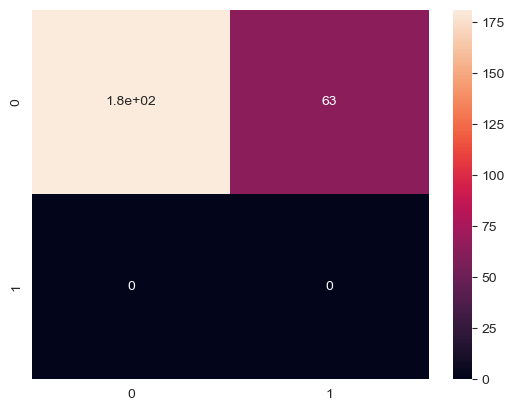

In [30]:
c_BernoulliNB_train = confusion_matrix(y_pred_train,y_train)
sns.heatmap(c_BernoulliNB_train, annot=True)

# 3. Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
DecisionTreeClassifier()
y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)
acc_test = metrics.accuracy_score(y_test, y_pred_test)
acc_train = metrics.accuracy_score(y_train, y_pred_train)
print(acc_test)
print(acc_train)

0.6612903225806451
0.9836065573770492


In [32]:
report_DecisionTree_test = classification_report(y_test, y_pred_test)

print("Classification Report for Decision Tree Test:")
print(report_DecisionTree_test)

Classification Report for Decision Tree Test:
              precision    recall  f1-score   support

           1       0.74      0.80      0.77        44
           2       0.40      0.33      0.36        18

    accuracy                           0.66        62
   macro avg       0.57      0.56      0.57        62
weighted avg       0.64      0.66      0.65        62



In [33]:
report_DecisionTree_train = classification_report(y_train, y_pred_train)

print("Classification Report for Decision Tree Train:")
print(report_DecisionTree_train)

Classification Report for Decision Tree Train:
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       181
           2       1.00      0.94      0.97        63

    accuracy                           0.98       244
   macro avg       0.99      0.97      0.98       244
weighted avg       0.98      0.98      0.98       244



<Axes: >

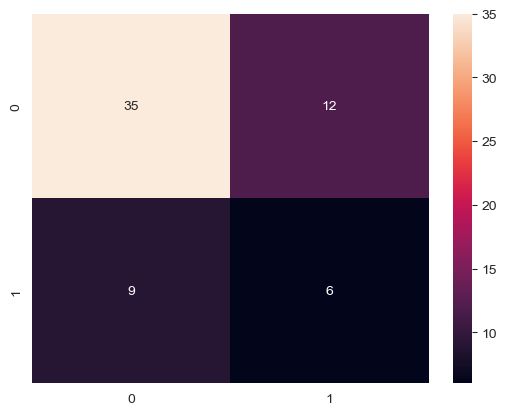

In [34]:
c_DecisionTree_test = confusion_matrix(y_pred_test,y_test)
sns.heatmap(c_DecisionTree_test, annot=True)

<Axes: >

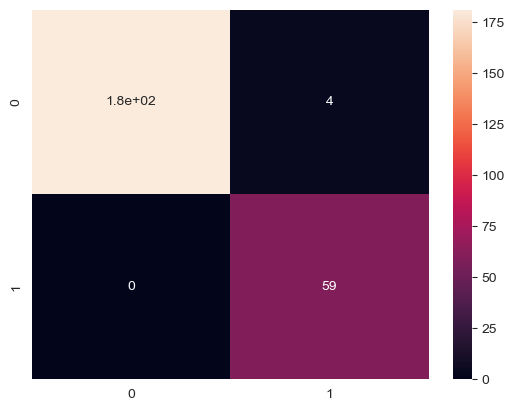

In [35]:
c_DecisionTree_train = confusion_matrix(y_pred_train,y_train)
sns.heatmap(c_DecisionTree_train, annot=True)

# 4. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100,
random_state=42)
rf_classifier.fit(x_train, y_train)
RandomForestClassifier(random_state=42)
y_pred_test = rf_classifier.predict(x_test)
y_pred_train = rf_classifier.predict(x_train)
acc_test = metrics.accuracy_score(y_test, y_pred_test)
acc_train = metrics.accuracy_score(y_train, y_pred_train)
print(acc_test)
print(acc_train)

0.7096774193548387
0.9836065573770492


In [37]:
report_RandomForest_test = classification_report(y_test, y_pred_test)

print("Classification Report for Random Forest Test:")
print(report_RandomForest_test)

Classification Report for Random Forest Test:
              precision    recall  f1-score   support

           1       0.74      0.91      0.82        44
           2       0.50      0.22      0.31        18

    accuracy                           0.71        62
   macro avg       0.62      0.57      0.56        62
weighted avg       0.67      0.71      0.67        62



In [38]:
report_RandomForest_train = classification_report(y_train, y_pred_train)

print("Classification Report for Random Forest Train:")
print(report_RandomForest_train)

Classification Report for Random Forest Train:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       181
           2       0.98      0.95      0.97        63

    accuracy                           0.98       244
   macro avg       0.98      0.97      0.98       244
weighted avg       0.98      0.98      0.98       244



<Axes: >

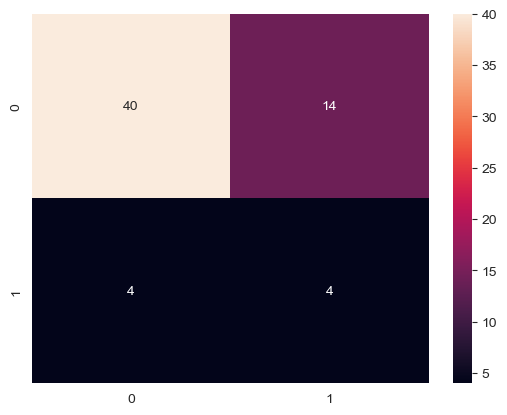

In [39]:
c_RandomForest_test = confusion_matrix(y_pred_test,y_test)
sns.heatmap(c_RandomForest_test, annot=True)

<Axes: >

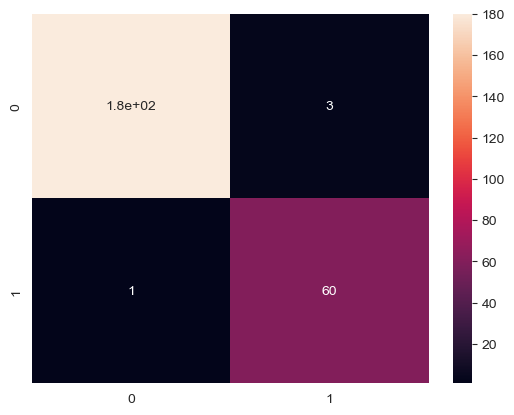

In [40]:
c_RandomForest_train = confusion_matrix(y_pred_train,y_train)
sns.heatmap(c_RandomForest_train, annot=True)

# 5. AdaBoost Classifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(x_train, y_train)

y_pred_test = adaboost_classifier.predict(x_test)
y_pred_train = adaboost_classifier.predict(x_train)
acc_test = metrics.accuracy_score(y_test, y_pred_test)
acc_train = metrics.accuracy_score(y_train, y_pred_train)
print(acc_test)
print(acc_train)

0.6935483870967742
0.8278688524590164


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [42]:
report_AdaBoost_test = classification_report(y_test, y_pred_test)

print("Classification Report for AdaBoost Test:")
print(report_AdaBoost_test)

Classification Report for AdaBoost Test:
              precision    recall  f1-score   support

           1       0.73      0.91      0.81        44
           2       0.43      0.17      0.24        18

    accuracy                           0.69        62
   macro avg       0.58      0.54      0.52        62
weighted avg       0.64      0.69      0.64        62



In [43]:
report_AdaBoost_train = classification_report(y_train, y_pred_train)

print("Classification Report for AdaBoost Train:")
print(report_AdaBoost_train)

Classification Report for AdaBoost Train:
              precision    recall  f1-score   support

           1       0.84      0.96      0.89       181
           2       0.78      0.46      0.58        63

    accuracy                           0.83       244
   macro avg       0.81      0.71      0.74       244
weighted avg       0.82      0.83      0.81       244



<Axes: >

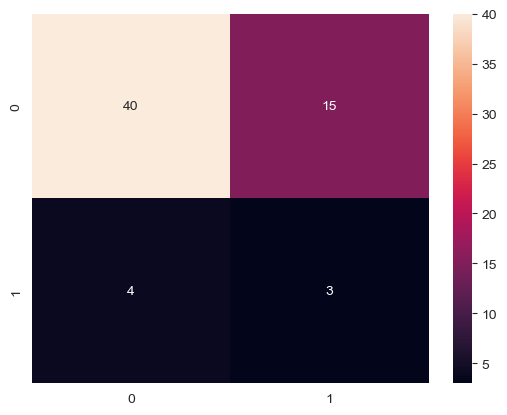

In [44]:
c_AdaBoost_test = confusion_matrix(y_pred_test,y_test)
sns.heatmap(c_AdaBoost_test, annot=True)

<Axes: >

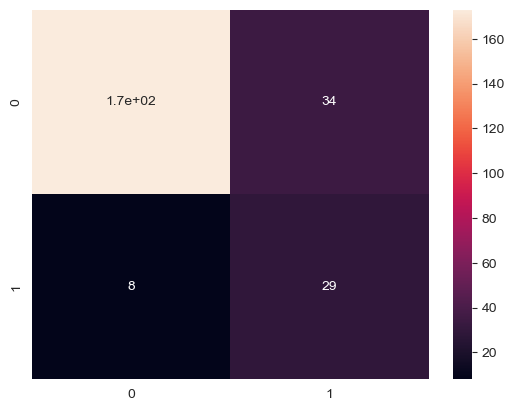

In [45]:
c_AdaBoost_train = confusion_matrix(y_pred_train,y_train)
sns.heatmap(c_AdaBoost_train, annot=True)

# Showing result in one platform

# Pretty Table

In [46]:
from prettytable import PrettyTable
comparison_table = PrettyTable(['Model', 'Test Accuracy', 'precision', 'recall','f1-score'])

In [47]:
from prettytable import PrettyTable
from sklearn.metrics import precision_score, recall_score, f1_score

# KNN
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

# Naive Bayes
G_classifier = GaussianNB()
G_classifier.fit(x_train, y_train)
y_pred_GaussianNB = G_classifier.predict(x_test)

# Decision Tree
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred_decision_tree = clf.predict(x_test)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred_random_forest = rf_classifier.predict(x_test)

# AdaBoost
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(x_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(x_test)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_GaussianNB = accuracy_score(y_test, y_pred_GaussianNB)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

# Precision
precision_knn = precision_score(y_test, y_pred_knn)
precision_GaussianNB = precision_score(y_test, y_pred_GaussianNB)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
precision_adaboost = precision_score(y_test, y_pred_adaboost)

# Recall
recall_knn = recall_score(y_test, y_pred_knn)
recall_GaussianNB = recall_score(y_test, y_pred_GaussianNB)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
recall_adaboost = recall_score(y_test, y_pred_adaboost)

# F1-score
f1_knn = f1_score(y_test, y_pred_knn)
f1_GaussianNB = f1_score(y_test, y_pred_GaussianNB)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)
f1_random_forest = f1_score(y_test, y_pred_random_forest)
f1_adaboost = f1_score(y_test, y_pred_adaboost)

# Creating PrettyTable
comparison_table = PrettyTable(['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score'])
comparison_table.add_row(['KNN', accuracy_knn, precision_knn, recall_knn, f1_knn])
comparison_table.add_row(['GaussianNB', accuracy_GaussianNB, precision_GaussianNB, recall_GaussianNB, f1_GaussianNB])
comparison_table.add_row(['Decision Tree', accuracy_decision_tree, precision_decision_tree, recall_decision_tree, f1_decision_tree])
comparison_table.add_row(['Random Forest', accuracy_random_forest, precision_random_forest, recall_random_forest, f1_random_forest])
comparison_table.add_row(['AdaBoost', accuracy_adaboost, precision_adaboost, recall_adaboost, f1_adaboost])

# Printing the comparison table
print(comparison_table)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


+---------------+--------------------+--------------------+--------------------+--------------------+
|     Model     |   Test Accuracy    |     Precision      |       Recall       |      F1-Score      |
+---------------+--------------------+--------------------+--------------------+--------------------+
|      KNN      | 0.7419354838709677 |        0.75        | 0.9545454545454546 |        0.84        |
|   GaussianNB  | 0.7096774193548387 | 0.7407407407407407 | 0.9090909090909091 | 0.8163265306122449 |
| Decision Tree | 0.6612903225806451 | 0.7446808510638298 | 0.7954545454545454 | 0.7692307692307693 |
| Random Forest | 0.7096774193548387 | 0.7407407407407407 | 0.9090909090909091 | 0.8163265306122449 |
|    AdaBoost   | 0.6935483870967742 | 0.7272727272727273 | 0.9090909090909091 | 0.8080808080808081 |
+---------------+--------------------+--------------------+--------------------+--------------------+


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Initializing and fitting SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model on the original data
rf_classifier.fit(x_train, y_train)

# Predictions on the original test set
y_pred_test_original = rf_classifier.predict(x_test)

# Fitting the model on the SMOTE data
rf_classifier.fit(x_train_smote, y_train_smote)

# Predictions on the SMOTE test set
y_pred_test_smote = rf_classifier.predict(x_test)

# Evaluating accuracy on both sets
acc_original = metrics.accuracy_score(y_test, y_pred_test_original)
acc_smote = metrics.accuracy_score(y_test, y_pred_test_smote)

print(f'Accuracy on Original Test Set: {acc_original:.3f}')
print(f'Accuracy on SMOTE Test Set: {acc_smote:.3f}')

Accuracy on Original Test Set: 0.710
Accuracy on SMOTE Test Set: 0.629
